# 1- Introduction

- Name : **Enggar Kristian**
- Recruitment Process : assignments that we've provide in link https://drive.google.com/drive/folders/1x5LvX3BAthgT2K8zpRq1faZTY84Fu9bC?usp=sharing.
- Company : PT. Sinar Mas Multiartha Tbk
- Role : Data Scientist/Data Engineer

## Objective : SOAL TEST ANALYSIS

NATURAL  LANGUAGE PROCESSING

A collection of tweets, labeled with 1 if it relates to disaster and 0 if it's not. Generate a model which perform classification task to decide if a tweet relate to disaster or not, using the data tweets given. You can use disaster_response_messages_training.csv for training data, disaster_response_messages_validation.csv for validation data, and disaster_response_messages_test.csv for testing data.






# 2 - Import Libraries

**Note: for programming language python I used in Google Colab, so the data connect to my personal gdrive.**

In [38]:
# Come into my google colab
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
!ls

data_cif_bad.csv
disaster_response_messages_test.csv
disaster_response_messages_training.csv
disaster_response_messages_validation.csv
suicide.csv


In [40]:
# masuk folder "model_ml_dl"
%cd /content/gdrive/MyDrive/data_science_test/PT. Sinar Mas Multiartha Tbk/Task

/content/gdrive/MyDrive/data_science_test/PT. Sinar Mas Multiartha Tbk/Task


In [41]:
# Check folder 
!ls

data_cif_bad.csv
disaster_response_messages_test.csv
disaster_response_messages_training.csv
disaster_response_messages_validation.csv
suicide.csv


In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import joblib
import pickle
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from pathlib import Path
from imblearn.over_sampling import RandomOverSampler
pd.set_option ("display.max_columns", 50) 


# Sklearn libraries 
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Modeling Macihne Learning
import tensorflow as tf 
from tensorflow import keras
import pathlib
np.random.seed(15)
tf.random.set_seed(15)
import re # for preprocessing text
import string # for preprocessing text
from sklearn.feature_extraction.text import CountVectorizer # to create Bag of words
import nltk # for processing texts
from nltk.corpus import stopwords # list of stop words
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, TimeDistributed, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.layers import Dense, Conv1D, GlobalAveragePooling1D, MaxPooling1D, Input, LSTM, GRU, SpatialDropout1D, Dense, Dropout, Masking, Embedding, Flatten, Input, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
import tensorflow_hub as hub
from tensorflow.keras.optimizers import SGD, Adam
# import bert
# from bert import tokenization

# EDA Visualization
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff


nltk.download("popular")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
SEED = 1337


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [43]:
tf.__version__

'2.8.2'

In [44]:
sklearn.__version__

'1.0.2'

# 3 - Data Loading

In [45]:
# Load the dataset
data_train = pd.read_csv('disaster_response_messages_training.csv')
data_val = pd.read_csv('disaster_response_messages_validation.csv')
data_test = pd.read_csv('disaster_response_messages_test.csv')

In [46]:
# Call Data Train
data_train

,id,split,message,original,genre,related,PII,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,train,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,train,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,12,train,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,train,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,train,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21041,30261,train,The training demonstrated how to enhance micro...,NaN,news,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21042,30262,train,A suitable candidate has been selected and OCH...,NaN,news,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21043,30263,train,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21044,30264,train,"Some 2,000 women protesting against the conduc...",NaN,news,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Data Train contains 21046 rows and 42 features it is huge data train.

In [47]:
# Call Data Validation
data_val.head()

,id,split,message,original,genre,related,PII,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,8,validation,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18,validation,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,28,validation,are you going to call me or do you want me to ...,Eske se rele nap relem oubyen se mwen kap rele...,direct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,38,validation,"People I'm at Delma 2, we don't anything what ...",MEZANMI MWEN MWEN NAN DELMA 2 NOU TR MAN MAL N...,direct,1,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,48,validation,How we can find food and water? we have people...,Comment nou ka jwen dlo ak manje nou gen moun ...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Call Data Test
data_test.head()

,id,split,message,original,genre,related,PII,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,9,test,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,39,test,We are at Gressier we needs assistance right a...,Se gressier nou an difikilte tanpri vin ede nou,direct,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,49,test,"Delmas 33 in Silo, need water.",Delma 33 silo gen problem dlo,direct,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,79,test,"SOS SOS, please provide police officers on the...",EMGENCY EMGENCY SI POLIS LA TE KA BAY PREZANS ...,direct,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,99,test,"I am a driver, a mechanic ,. I want to help","MWEN SE YON NMALIEN, CHOF, MEKANISYEN MWEN BEZ...",direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
# Want to know data types 
print("Data Train")
print(data_train.info())
print("="*50)
print("Data Validation")
print(data_val.info())
print("="*50)
print("Data Test")
print(data_test.info())

Data Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21046 entries, 0 to 21045
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      21046 non-null  int64 
 1   split                   21046 non-null  object
 2   message                 21046 non-null  object
 3   original                8191 non-null   object
 4   genre                   21046 non-null  object
 5   related                 21046 non-null  int64 
 6   PII                     21046 non-null  int64 
 7   request                 21046 non-null  int64 
 8   offer                   21046 non-null  int64 
 9   aid_related             21046 non-null  int64 
 10  medical_help            21046 non-null  int64 
 11  medical_products        21046 non-null  int64 
 12  search_and_rescue       21046 non-null  int64 
 13  security                21046 non-null  int64 
 14  military                21046 non-null  int

- There are columns have contains int64 38 columns and object have 4 columns
- There's a huge missing values here on column `original` then will be drop on sub chapter Handling Missing Values. 
- Our main features is column `message` that is a tweet for detect the label
- And this is Natural Language Programming then modeling with deep learning

In [50]:
# Know about unique all columns in data_trainset
for col in data_train:
    print(f'{col}: {data_train[col].unique()}')

id: [    2     7    12 ... 30263 30264 30265]
split: ['train']
message: ['Weather update - a cold front from Cuba that could pass over Haiti'
 'Is the Hurricane over or is it not over'
 'says: west side of Haiti, rest of the country today and tonight' ...
 "Proshika, operating in Cox's Bazar municipality and 5 other unions, Ramu and Chokoria, assessment, 5 kg rice, 1,5 kg lentils to 700 families."
 'Some 2,000 women protesting against the conduct of the elections were teargassed as they tried to converge on the local electoral commission offices in the southern oil city of Port Harcourt.'
 'A radical shift in thinking came about as a result of this meeting, recognizing that HIV/AIDS is at the core of the humanitarian crisis and identifying the crisis itself as a function of the HIV/AIDS pandemic.']
original: ['Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region ce soi'
 'Cyclone nan fini osin

In [51]:
data_train.related.value_counts()

1    15795
0     5083
2      168
Name: related, dtype: int64

- There's a column ID it is useless for modeling then will be drop
- Many binary classification in our data for 0 = no and 1 = yes those are our target label
- But we can see from column `related` there are 3 labels that is 0, 1, and 2 we don't know what is label 2, then we will not use rows with contains label 2 on column `related'


In [52]:
# Copy the data
data_train_copy = data_train.copy()
data_val_copy = data_val.copy()
data_test_copy = data_test.copy()

In [53]:
# Drop column id
data_train.drop(['id'], axis=1, inplace=True)
data_val.drop(['id'], axis=1, inplace=True)
data_test.drop(['id'], axis=1, inplace=True)

In [54]:
# query without contains label 2 in column related
data_train_copy.drop(data_train_copy[(data_train_copy['related']==2)].index, inplace=True)
data_val_copy.drop(data_val_copy[(data_val_copy['related']==2)].index, inplace=True)
data_test_copy.drop(data_test_copy[(data_test_copy['related']==2)].index, inplace=True)
data_test_copy.related.value_counts()

1    2210
0     410
Name: related, dtype: int64

Well dataset there's no contains labels 2 in column `related`

In [55]:
print('Data Train Shape')
print(data_train_copy.shape)
print('')
print('Data Validation Shape')
print(data_val_copy.shape)
print('')
print('Data Test Shape')
print(data_test_copy.shape)

Data Train Shape
(20878, 42)

Data Validation Shape
(2557, 42)

Data Test Shape
(2620, 42)


Of course the size will be change:
- Data Train from 21046 rows change to 20878 rows
- Data Validation from 2573 change to 2557 rows
- Data test from 2629 change to 2620 rows

# 4 - Exploratory Data Analysis

From this chapter the dataset will be concate because for to know insight a whole the dataset

In [56]:
# concat data train, data validation and data test
data_eda = pd.concat([data_train_copy, data_val_copy, data_val_copy])

## Target Binary Distribution

In [57]:
data_eda['related'].value_counts()

1    19645
0     6347
Name: related, dtype: int64

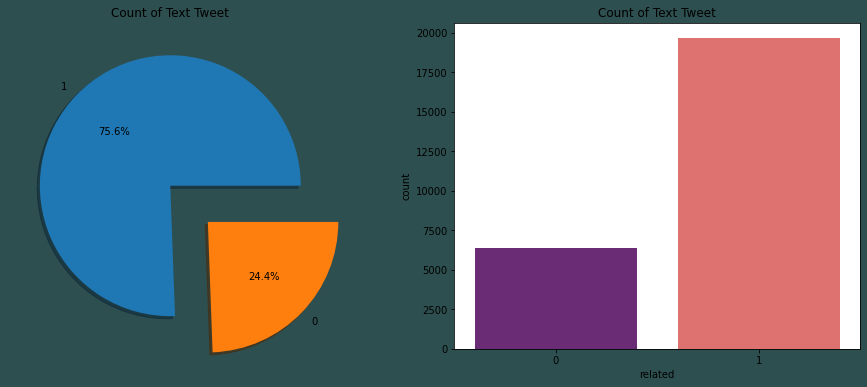

In [58]:
f,ax=plt.subplots(1,2,figsize=(16,6), facecolor=(.18, .31, .31))
data_eda['related'].value_counts().plot.pie(explode=[0,0.4],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('Count of Text Tweet')
ax[0].set_title('Count of Text Tweet')
ax[0].set_ylabel('')
sns.countplot('related',data=data_eda,ax=ax[1], palette = 'magma')
ax[1].set_title('Count of Text Tweet')
plt.show()

The target distribution is imbalance data it may impact for the model bias, should be improve data with oversampling later.

## Word Frequency

In [286]:
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff


data_eda1_df = data_eda[data_eda["related"]==1]
data_eda0_df = data_eda[data_eda["related"]==0]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in data_eda0_df["message"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'red')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in data_eda1_df["message"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words if tweet is not real disaster", 
                                          "Frequent words if tweet is real disaster"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Words that have not occurred are labeled not related, because they are related to the nature of the word that has not occurred, it is only natural that they are not related. However, the word related shows a word that is present or has already happened, so it is only natural that it is related to disaster.

## Word Cloud

Tweet probably safe from disaster


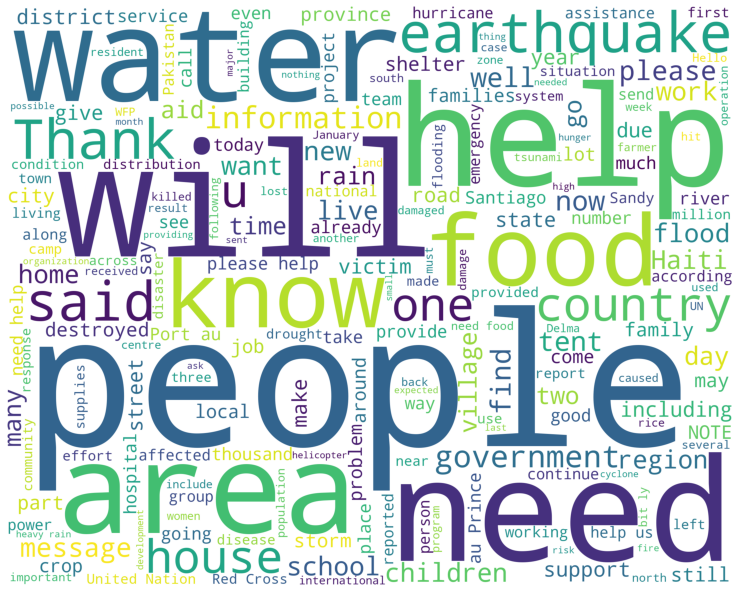

Tweet probably related from disaster


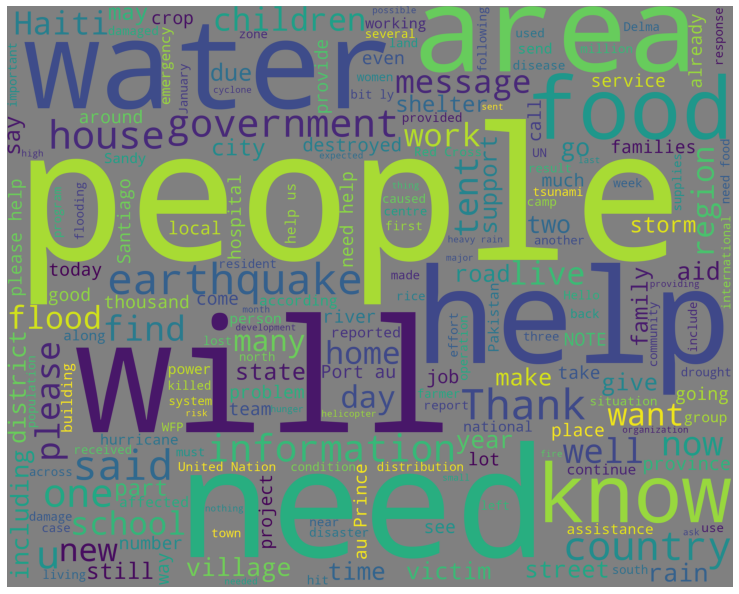

In [59]:
# Make wordcloud for want to know dominant words 
data_safe = data_eda[ data_eda['related'] == 0]
data_safe = data_eda['message']
data_rel = data_eda[ data_eda['related'] == 1]
data_rel = data_eda['message']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Tweet probably safe from disaster")
wordcloud_draw(data_safe,'white')
print("Tweet probably related from disaster")
wordcloud_draw(data_rel,'grey')

When viewed on wordcloud, there is not much significant difference between related and not related.

# 5 - Data Preprocessing



## Handling Missing Values

In [60]:
def check_missing(data):
    """
    Check the missing values in dataset

    Parameters
    ----------
    data : DataFrame

    Returns
    -------
    DataFrame
        Missing values in dataset
    """

    # create a DataFrame to store the missing values
    data_missing = pd.DataFrame(data.isna().sum().sort_values(ascending=False), columns=['tot_missing']).reset_index()

    # reset the index and make the features columns
    data_missing = data_missing.rename(columns={'index': 'feats'})

    # drop the rows with no missing values
    data_missing = data_missing[data_missing['tot_missing'] > 0]

    # calculate the percentage of missing values for each features
    data_missing['tot_missing_pct'] = data_missing['tot_missing'] / len(data) * 100

    return data_missing

In [61]:
# check missing values in train set
print("Missing values in data train")
check_missing(data_train_copy)

Missing values in data train


,feats,tot_missing,tot_missing_pct
0,original,12804,61.327713


In [62]:
# check missing values in validation set
print("Missing values in data validation")
check_missing(data_val_copy)

Missing values in data validation


,feats,tot_missing,tot_missing_pct
0,original,1581,61.83027


In [63]:
# check missing values in test set
print("Missing values in data test")
check_missing(data_test_copy)

Missing values in data test


,feats,tot_missing,tot_missing_pct
0,original,1623,61.946565


Well that i said before, there's huge missing values on the dataset containts 61.9% missing values that's bad for modelling then i will drop the column `original`

In [64]:
data_train_copy.drop(['original'], axis=1, inplace=True)
data_val_copy.drop(['original'], axis=1, inplace=True)
data_test_copy.drop(['original'], axis=1, inplace=True)
data_train_copy.shape

(20878, 41)

The column `original` has been drop, then the feature reduced to 41 column from 42 features.

## Cleaning Data Text

In this Natural Language Program, the data is tabular which contains text and sentiment labels. The text will be cleaned of annoying noise such as punctuation marks, numbers, special words, links, and others. So below I will do data cleaning.

In [65]:
# let's take a sample one text
data_train_copy['message'][27]


'People have been sleeping outdoors in a field near Lilavois since 12 Jan. No coords on Lilavois but apparently it is near PaP'

In [66]:
def clean_text(text):
  '''
  DESCRIPTION:
  This function to clean text 
  INPUT: 
  text: string
  OUTPUT: 
  text: string after clean it
  ''' 
  text = text.lower() # convert letters to lower case
  # Contractions
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"there's", "there is", text)
  text = re.sub(r"We're", "We are", text)
  text = re.sub(r"That's", "That is", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"they're", "they are", text)
  text = re.sub(r"Can't", "Cannot", text)
  text = re.sub(r"wasn't", "was not", text)
  text = re.sub(r"don\x89Ûªt", "do not", text)
  text = re.sub(r"aren't", "are not", text)
  text = re.sub(r"isn't", "is not", text)
  text = re.sub(r"What's", "What is", text)
  text = re.sub(r"haven't", "have not", text)
  text = re.sub(r"hasn't", "has not", text)
  text = re.sub(r"There's", "There is", text)
  text = re.sub(r"He's", "He is", text)
  text = re.sub(r"It's", "It is", text)
  text = re.sub(r"You're", "You are", text)
  text = re.sub(r"I'M", "I am", text)
  text = re.sub(r"shouldn't", "should not", text)
  text = re.sub(r"wouldn't", "would not", text)
  text = re.sub(r"i'm", "I am", text)
  text = re.sub(r"I\x89Ûªm", "I am", text)
  text = re.sub(r"I'm", "I am", text)
  text = re.sub(r"Isn't", "is not", text)
  text = re.sub(r"Here's", "Here is", text)
  text = re.sub(r"you've", "you have", text)
  text = re.sub(r"you\x89Ûªve", "you have", text)
  text = re.sub(r"we're", "we are", text)
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"couldn't", "could not", text)
  text = re.sub(r"we've", "we have", text)
  text = re.sub(r"it\x89Ûªs", "it is", text)
  text = re.sub(r"doesn\x89Ûªt", "does not", text)
  text = re.sub(r"It\x89Ûªs", "It is", text)
  text = re.sub(r"Here\x89Ûªs", "Here is", text)
  text = re.sub(r"who's", "who is", text)
  text = re.sub(r"I\x89Ûªve", "I have", text)
  text = re.sub(r"y'all", "you all", text)
  text = re.sub(r"can\x89Ûªt", "cannot", text)
  text = re.sub(r"would've", "would have", text)
  text = re.sub(r"it'll", "it will", text)
  text = re.sub(r"we'll", "we will", text)
  text = re.sub(r"wouldn\x89Ûªt", "would not", text)
  text = re.sub(r"We've", "We have", text)
  text = re.sub(r"he'll", "he will", text)
  text = re.sub(r"Y'all", "You all", text)
  text = re.sub(r"Weren't", "Were not", text)
  text = re.sub(r"Didn't", "Did not", text)
  text = re.sub(r"they'll", "they will", text)
  text = re.sub(r"they'd", "they would", text)
  text = re.sub(r"DON'T", "DO NOT", text)
  text = re.sub(r"That\x89Ûªs", "That is", text)
  text = re.sub(r"they've", "they have", text)
  text = re.sub(r"i'd", "I would", text)
  text = re.sub(r"should've", "should have", text)
  text = re.sub(r"You\x89Ûªre", "You are", text)
  text = re.sub(r"where's", "where is", text)
  text = re.sub(r"Don\x89Ûªt", "Do not", text)
  text = re.sub(r"we'd", "we would", text)
  text = re.sub(r"i'll", "I will", text)
  text = re.sub(r"weren't", "were not", text)
  text = re.sub(r"They're", "They are", text)
  text = re.sub(r"Can\x89Ûªt", "Cannot", text)
  text = re.sub(r"you\x89Ûªll", "you will", text)
  text = re.sub(r"I\x89Ûªd", "I would", text)
  text = re.sub(r"let's", "let us", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"can't", "cannot", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"you're", "you are", text)
  text = re.sub(r"i've", "I have", text)
  text = re.sub(r"that's", "that is", text)
  text = re.sub(r"i'll", "I will", text)
  text = re.sub(r"doesn't", "does not", text)
  text = re.sub(r"i'd", "I would", text)
  text = re.sub(r"didn't", "did not", text)
  text = re.sub(r"ain't", "am not", text)
  text = re.sub(r"you'll", "you will", text)
  text = re.sub(r"I've", "I have", text)
  text = re.sub(r"Don't", "do not", text)
  text = re.sub(r"I'll", "I will", text)
  text = re.sub(r"I'd", "I would", text)
  text = re.sub(r"Let's", "Let us", text)
  text = re.sub(r"you'd", "You would", text)
  text = re.sub(r"It's", "It is", text)
  text = re.sub(r"Ain't", "am not", text)
  text = re.sub(r"Haven't", "Have not", text)
  text = re.sub(r"Could've", "Could have", text)
  text = re.sub(r"youve", "you have", text)  
  text = re.sub(r"donå«t", "do not", text)   
          
  # Character entity references
  text = re.sub(r"&gt;", ">", text)
  text = re.sub(r"&lt;", "<", text)
  text = re.sub(r"&amp;", "&", text)
  text = re.sub("@[A-Za-z0-9_]+"," ", text) #r emove mention
  text = re.sub("#[A-Za-z0-9_]+"," ", text) # remove hashtag
  text = re.sub(r"\\n"," ",text) # remove \n
  text = re.sub(r'http\S+', '', text) # remove links
  text = re.sub(r"www.\S+", " ", text) # remove link
  text = re.sub("rt"," ",text) # remove RT

  text = text.lower() # convert letters to lower case
  text = text.translate(str.maketrans('','', string.punctuation)) # remove punctuation
  text = re.sub(' +', ' ',text) # remove extra space
  text = text.strip() # remove whitespaces

  # Name for month
  text = re.sub(r"jan", "january", text)  
  text = re.sub(r"feb", "february", text)
  text = re.sub(r"mar", "march", text)
  text = re.sub(r"apr", "april", text)
  text = re.sub(r"jun", "june", text)
  text = re.sub(r"jul", "july", text)
  text = re.sub(r"aug", "august", text)
  text = re.sub(r"sep", "september", text)
  text = re.sub(r"oct", "october", text)
  text = re.sub(r"nov", "november", text)
  text = re.sub(r"dec", "december", text)

  # remove stopwords
  stpwds_id = list(set(stopwords.words('english')))
  stpwds_id.append('the’, ‘a’, ‘on’, ‘is’, ‘all’')

  tokens = word_tokenize(text)

  text = ' '.join([word for word in tokens if word not in stpwds_id])

  return text

- Tweets that have been translated into English, of course, many abbreviations are made, so to prevent the abbreviations from being lost due to cleaning, we define by word there is no punctuation element in the word.

- Next, we remove special words or symbols or emojis or numbers that have no meaning to predict in the NLP model.

- After one sentence has been in the form of a word, then everything is changed to lowercase letters, eliminating punctuation, sometimes words that have been cleaned will have extra space and then are cleaned.

- There are several abbreviations for the month, it is necessary to explain the word because the word adverb of time is a fact

- Eliminate conjunctions or conjunctions in English

In [67]:
%%time
# The cleaning function applied in all reviews
data_train_copy['text_processed'] = data_train_copy['message'].apply(lambda x: clean_text(x))
data_val_copy['text_processed'] = data_val_copy['message'].apply(lambda x: clean_text(x))
data_test_copy['text_processed'] = data_test_copy['message'].apply(lambda x: clean_text(x))


CPU times: user 14.4 s, sys: 642 ms, total: 15.1 s
Wall time: 15.2 s


In [352]:
data_train_copy['text_processed'][27]

'people sleeping outdoors field near lilavois since 12 january coords lilavois apparently near pap'

## Splitting Dataset

NLP just have 1 feature that must to be cleaning first, and have 1 target

In [69]:
# Split between `X` (Features) dan `y` ('text_processed')

# Train set
X_train = data_train_copy['text_processed']
y_train = data_train_copy['related']

# Validation set
X_val = data_val_copy['text_processed']
y_val = data_val_copy['related']

# Test set 
X_test = data_test_copy['text_processed']
y_test = data_test_copy['related']

print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (20878,)
Validation data shape: (2557,)
Testing data shape: (2620,)


## Tokenization & Word Embedding

In [190]:
# Change object type be numerical
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

print(X_train_vec)

  (0, 31180)	1
  (0, 30245)	1
  (0, 6855)	1
  (0, 12164)	1
  (0, 8012)	1
  (0, 7686)	1
  (0, 21492)	1
  (0, 13319)	1
  (1, 14362)	1
  (2, 13319)	1
  (2, 25383)	1
  (2, 31291)	1
  (2, 26272)	1
  (2, 24439)	1
  (2, 7715)	1
  (2, 28999)	1
  (2, 29082)	1
  (3, 15065)	1
  (3, 19790)	1
  (3, 21328)	1
  (4, 27386)	1
  (4, 25033)	1
  (4, 13618)	1
  (4, 15851)	1
  (5, 22181)	1
  :	:
  (20876, 26882)	1
  (20876, 10121)	1
  (20876, 20663)	1
  (20876, 29439)	1
  (20876, 10123)	1
  (20876, 7229)	1
  (20876, 6998)	1
  (20876, 7510)	1
  (20876, 23047)	1
  (20876, 28373)	1
  (20876, 13487)	1
  (20877, 14309)	1
  (20877, 5658)	1
  (20877, 28733)	1
  (20877, 24465)	1
  (20877, 7891)	2
  (20877, 13971)	2
  (20877, 12249)	1
  (20877, 18510)	1
  (20877, 26108)	1
  (20877, 7597)	1
  (20877, 14544)	1
  (20877, 21373)	1
  (20877, 23414)	1
  (20877, 23813)	1


Well after transform to numerik, it turns out that from the raw data of 20878 rows it turns out that the engine only detects 20877 different words in this dataset

In [71]:
# after we do transform to numerik, we should change to weight each words
Transformer = TfidfTransformer()

X_train_tfidf = Transformer.fit_transform(X_train_vec)
X_val_tfidf = Transformer.transform(X_val_vec)
X_test_tfidf = Transformer.transform(X_test_vec)

print(X_train_tfidf)

  (0, 31180)	0.30328710684336985
  (0, 30245)	0.4268014352942732
  (0, 21492)	0.3482528132024353
  (0, 13319)	0.24800035648243776
  (0, 12164)	0.3813523596450722
  (0, 8012)	0.4506134249293827
  (0, 7686)	0.2803102786977599
  (0, 6855)	0.3406131730532918
  (1, 14362)	1.0
  (2, 31291)	0.34218977766533537
  (2, 29082)	0.408405587488051
  (2, 28999)	0.32555820232570776
  (2, 26272)	0.4023995572276556
  (2, 25383)	0.36102411087920977
  (2, 24439)	0.42131007943062837
  (2, 13319)	0.25987443873237737
  (2, 7715)	0.26985583158215054
  (3, 21328)	0.7683878932112721
  (3, 19790)	0.488360668266874
  (3, 15065)	0.41362289982092987
  (4, 27386)	0.33918915572902064
  (4, 25033)	0.6768362004916253
  (4, 15851)	0.4917829813275006
  (4, 13618)	0.4301080952697006
  (5, 31078)	0.26859165255797196
  :	:
  (20876, 20700)	0.20706747109744134
  (20876, 20663)	0.2506570636958542
  (20876, 17481)	0.16295977364971445
  (20876, 13487)	0.33427946318162394
  (20876, 10123)	0.23743810280326272
  (20876, 10121)	0.2

The data has change, and ready to modeling!

## Embedding Layer in Deep Learning with Tensorflow

In [72]:
# Want to know how many vocab and maximum words in a text
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Length vocab:",total_vocab)
print("Length Maximum Text:",max_sen_len,"words")

Length vocab: 32116
Length Maximum Text: 1088 words


Want to know size of total vocabulary that will be to input shape in model definition
- Have total vocaboluary on dataset 32116 words
- There are 1088  words that contains in one sentence in dataset

In [73]:
# define vocab than convert to numeric
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # if i want to use sequential API
                                       )

text_vectorization.adapt(X_train) # adapt looks like fit

In [74]:
# let's check the result vectorization
data_train_copy.text_processed[17822]

'ocha repo seven worst affected districts 70 shelters completely destroyed including 1015 houses nonthatch roofs'

In [75]:
# after convert it
text_vectorization([data_train_copy.text_processed[17822]])

<tf.Tensor: shape=(1, 1088), dtype=int64, numpy=array([[1850,   25,  814, ...,    0,    0,    0]])>

In [76]:
# Change the numerical to weight with embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=256,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [77]:
# see the result
emb_res = embedding(text_vectorization([data_train_copy.text_processed[17822]]))
emb_res

<tf.Tensor: shape=(1, 1088, 256), dtype=float32, numpy=
array([[[ 2.0317640e-02, -4.4464827e-02,  8.0201998e-03, ...,
          4.0223453e-02,  3.3253703e-02,  3.6844697e-02],
        [ 1.9457724e-02,  1.3042066e-02,  1.1096586e-02, ...,
         -7.6625124e-03, -2.6098955e-02,  1.8344652e-02],
        [-2.2562707e-02, -2.8328275e-02, -3.9716519e-02, ...,
         -1.4472753e-05,  2.1084771e-03,  2.2093344e-02],
        ...,
        [ 4.2009961e-02, -2.5866032e-02, -4.3662667e-02, ...,
          4.4837896e-02, -2.8865254e-02, -5.9206113e-03],
        [ 4.2009961e-02, -2.5866032e-02, -4.3662667e-02, ...,
          4.4837896e-02, -2.8865254e-02, -5.9206113e-03],
        [ 4.2009961e-02, -2.5866032e-02, -4.3662667e-02, ...,
          4.4837896e-02, -2.8865254e-02, -5.9206113e-03]]], dtype=float32)>

Dataset has converted. Embedding looks like scaling in feature engineering.

In [78]:
# let's check weight word 
emb_res[0][10]

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([ 1.89611055e-02, -1.91935543e-02,  3.18471231e-02,  2.55154110e-02,
       -1.34320967e-02,  4.32397984e-02,  4.65353467e-02,  1.81715600e-02,
        4.23400886e-02,  1.24514103e-02, -1.50986761e-03,  2.72557475e-02,
        3.87218483e-02,  2.32386850e-02,  3.97279523e-02,  9.59478691e-03,
        6.93186373e-03,  1.82998888e-02,  3.59019525e-02,  7.89105892e-03,
       -3.28137726e-03, -3.92135605e-02, -1.40496716e-02,  4.28623445e-02,
       -4.94537950e-02, -1.36787891e-02,  3.05717029e-02,  3.06209661e-02,
        4.24441807e-02, -1.72102824e-02, -4.02881615e-02, -5.19528985e-05,
       -1.59577616e-02, -2.75014173e-02,  3.25848572e-02,  1.63490511e-02,
        2.27561332e-02,  2.34635212e-02, -2.01517586e-02, -1.85990445e-02,
       -1.96866393e-02,  3.44872512e-02,  4.70264219e-02,  9.34987143e-03,
       -2.20082700e-04,  3.14836837e-02, -6.72703981e-03,  3.13557684e-04,
        4.93215956e-02, -4.09428030e-03, -3.08887847

well define the weight with embedding for each word in 256 dimensions.

## Oversampling with RandomOverSampler

Oversampling to do improvements in deep learning

In [296]:
ros = RandomOverSampler()
X_train_balanced, y_train_balanced = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
X_val_balanced, y_val_balanced = ros.fit_resample(np.array(X_val).reshape(-1, 1), np.array(y_val).reshape(-1, 1));

print('X_train shape berfore oversampling :', X_train.shape)
print('y_train shape berfore oversampling :', y_train.shape)
print('X_val shape berfore oversampling   :', X_val.shape)
print('y_val shape berfore oversampling   :', y_val.shape)

X_train shape berfore oversampling : (20878,)
y_train shape berfore oversampling : (20878,)
X_val shape berfore oversampling   : (2557,)
y_val shape berfore oversampling   : (2557,)


In [297]:
# print shape after oversampling
print('X_train_balanced shape after oversampling:', X_train_balanced.shape)
print('y_train_balanced shape after oversampling:', y_train_balanced.shape)
print('X_val_balanced shape after oversampling:', X_val_balanced.shape)
print('y_val_balanced shape after oversampling:', y_val_balanced.shape)

X_train_balanced shape after oversampling: (31590, 1)
y_train_balanced shape after oversampling: (31590,)
X_val_balanced shape after oversampling: (3850, 1)
y_val_balanced shape after oversampling: (3850,)


## Get Dummies

Before we modeling, we will do dummy the target, this is looks like onehotencoder with manual coding. Labels will be a features after dummy according to its uniqueness, if a certain line is detected, the label will contain a value of 1

In [81]:
# convert label
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_train_balanced_ohe = to_categorical(y_train_balanced)
y_val_balanced_ohe = to_categorical(y_val_balanced)

y_test_ohe = to_categorical(y_test)

y_train_ohe

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

The result will be an array.

In [82]:
# if we looks in dataframe will be like this
pd.get_dummies(y_train)

,0,1
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
21041,1,0
21042,1,0
21043,0,1
21044,0,1


There are 2 uniques in column 'label' so will be define 2 features in dataframe.

# 6 - Model Training

For this model our goals is increase recall, because if have big false negative will be danger for prediction disaster. 

## MultinomialNB

In [376]:
# Create a Multinomial Naive Bayes model
pipe_nb = Pipeline([
    ('bow', CountVectorizer()), 
    # ('tfid', TfidfTransformer()),  
    ('model', MultinomialNB())
])

# Train the model
pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('model', MultinomialNB())])

In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

In [377]:
# Make class anf probability predictions
y_pred_class = pipe_nb.predict(X_test)
y_pred_prob = pipe_nb.predict_proba(X_test)[:, 1]
y_pred_class

array([1, 1, 1, ..., 0, 1, 1])

In [393]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
# res_argmax_lstm_imp = yp_seq_lstm_imp.argmax(axis=1)
print('Classification Report (Model Sequential Improvement MultinomialNB)')
# print(classification_report(y_train, y_pred_train, target_names=["Not Related Disasater", "Related Disaster"]))
print(classification_report(y_test, y_pred_class, target_names=["Not Related Disasater", "Related Disaster"]))

Classification Report (Model Sequential Improvement MultinomialNB)
                       precision    recall  f1-score   support

Not Related Disasater       0.52      0.59      0.55       410
     Related Disaster       0.92      0.90      0.91      2210

             accuracy                           0.85      2620
            macro avg       0.72      0.74      0.73      2620
         weighted avg       0.86      0.85      0.85      2620



well we have result not good in model MultinomialNB, good to predict recall `Not Related Disaster` and `Related Disaster` it is may use to our model inference.

## XGBoost

In [331]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        colsample_bytree=0.8,
        subsample=0.7,
        min_child_weight=5,
    ))
])

In [332]:
%%time
# Fit the pipeline with the data
pipe.fit(X_train, y_train)

y_pred_class = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

# print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
# print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

# conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

CPU times: user 8.96 s, sys: 1.63 ms, total: 8.96 s
Wall time: 8.91 s


In [333]:
# Classification report
print('Classification Report (Model Sequential Improvement XGBoost)')
print(classification_report(y_test, y_pred_class, target_names=["Not Related Disasater", "Related Disaster"]))

Classification Report (Model Sequential Improvement XGBoost)
                       precision    recall  f1-score   support

Not Related Disasater       0.60      0.26      0.36       410
     Related Disaster       0.88      0.97      0.92      2210

             accuracy                           0.86      2620
            macro avg       0.74      0.61      0.64      2620
         weighted avg       0.83      0.86      0.83      2620



We have good accuracy on XGB, but look at recall `Not Related Disaster` it contains 26% it is also have many False Negative, if the model bias predict `Related Disaster` even though it's `Not Related Disaster` will trigger panic in the community, this model will later be used for disaster prediction development.

## Model Conv1D with DNN 

I have tried with the LSTM and GRU models, but the results obtained are not as expected, namely very biased, which refers to the predictive results of only one side of the two binary classification labels. So I did my third research using the Deep Neural Network which uses Conv1D for text and GlobalAveragePooling1D to be the global average weight that has been vectorized.

In [256]:
model_dnn = Sequential()
model_dnn.add(text_vectorization)
model_dnn.add(embedding)
model_dnn.add(Conv1D(256, 5, activation='relu'))
model_dnn.add(GlobalAveragePooling1D())
model_dnn.add(Dense(256,activation='relu'))
# # model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(2,activation='softmax'))


model_dnn.compile(loss='categorical_crossentropy',
                    optimizer='Adam',
                    metrics='accuracy')

model_dnn.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1088)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1088, 256)         8221696   
                                                                 
 conv1d_26 (Conv1D)          (None, 1084, 256)         327936    
                                                                 
 global_average_pooling1d_9   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_101 (Dense)           (None, 256)               65792     
                                                                 
 dropout_71 (Dropout)        (None, 256)             

In [258]:
%%time
model_dnn_hist = model_dnn.fit(X_train,
                         y_train_ohe, 
                         epochs=10,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/10
653/653 [==============================] - 14s 21ms/step - loss: 0.0339 - accuracy: 0.9874 - val_loss: 1.4692 - val_accuracy: 0.7822
Epoch 2/10
653/653 [==============================] - 13s 20ms/step - loss: 0.0287 - accuracy: 0.9888 - val_loss: 1.5907 - val_accuracy: 0.7833
Epoch 3/10
653/653 [==============================] - 13s 20ms/step - loss: 0.0245 - accuracy: 0.9905 - val_loss: 1.6311 - val_accuracy: 0.7747
Epoch 4/10
653/653 [==============================] - 13s 20ms/step - loss: 0.0210 - accuracy: 0.9925 - val_loss: 1.8207 - val_accuracy: 0.7763
Epoch 5/10
653/653 [==============================] - 13s 20ms/step - loss: 0.0187 - accuracy: 0.9931 - val_loss: 1.9631 - val_accuracy: 0.7814
Epoch 6/10
653/653 [==============================] - 13s 20ms/step - loss: 0.0165 - accuracy: 0.9938 - val_loss: 1.9849 - val_accuracy: 0.7806
Epoch 7/10
653/653 [==============================] - 13s 20ms/step - loss: 0.0154 - accuracy: 0.9941 - val_loss: 2.1832 - val_accuracy:

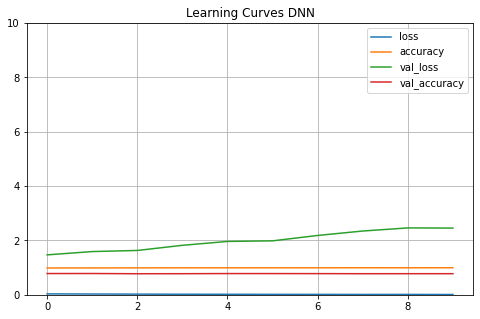

In [260]:
pd.DataFrame(model_dnn_hist.history).plot(figsize=(8, 5))
plt.grid(True)

plt.gca().set_ylim(0, 10)
plt.title("Learning Curves DNN")
plt.show()

As we can see historical graph from deep learning, shows there is a possibility of overfit ya as we can see we have little size for validation and test data compared by data training, but we cannot state just from Learning Curves for the result, we must move to metrics classification reports that's real results. 

In [264]:
model_dnn.evaluate(X_test, y_test_ohe, batch_size=64)

41/41 [==============================] - 1s 13ms/step - loss: 1.7863 - accuracy: 0.8107


[1.78629732131958, 0.8106870055198669]

In [266]:
yp_seq_dnn = model_dnn.predict(X_test)
yp_seq_dnn[:20]

array([[1.0246012e-15, 1.0000000e+00],
       [5.4411380e-16, 1.0000000e+00],
       [3.5576633e-07, 9.9999964e-01],
       [4.1645811e-07, 9.9999964e-01],
       [1.4667811e-03, 9.9853325e-01],
       [3.2723237e-09, 1.0000000e+00],
       [6.5198407e-02, 9.3480152e-01],
       [1.9060862e-11, 1.0000000e+00],
       [8.2519915e-15, 1.0000000e+00],
       [2.2877143e-06, 9.9999774e-01],
       [6.5363048e-09, 1.0000000e+00],
       [9.7008163e-01, 2.9918397e-02],
       [9.9150566e-06, 9.9999011e-01],
       [1.8540663e-24, 1.0000000e+00],
       [5.0065842e-07, 9.9999952e-01],
       [3.4066798e-05, 9.9996591e-01],
       [9.0923405e-01, 9.0765968e-02],
       [1.5940738e-16, 1.0000000e+00],
       [2.2794119e-11, 1.0000000e+00],
       [9.9990797e-01, 9.2009061e-05]], dtype=float32)

In [267]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_dnn = yp_seq_dnn.argmax(axis=1)
print('Classification Report (Model Sequential DNN)')
print(classification_report(y_test, res_argmax_dnn, target_names=["Not Related Disasater", "Related Disaster"]))

Classification Report (Model Sequential DNN)
                       precision    recall  f1-score   support

Not Related Disasater       0.42      0.55      0.48       410
     Related Disaster       0.91      0.86      0.88      2210

             accuracy                           0.81      2620
            macro avg       0.67      0.71      0.68      2620
         weighted avg       0.84      0.81      0.82      2620



He predicted that recall was quite good for this DNN model, we can see the improvements

## Model Conv1D with DNN Improvements

These improvements are expected to increase Recall and Accuracy from previous DNN models.

In [281]:
model_dnn_imp = Sequential()
model_dnn_imp.add(text_vectorization)
model_dnn_imp.add(embedding)
model_dnn_imp.add(Conv1D(256, 5, activation='relu'))
model_dnn_imp.add(Conv1D(128, 5, activation='relu'))
model_dnn_imp.add(GlobalAveragePooling1D())
model_dnn_imp.add(Dense(256,activation='relu'))
# # model_dnn_imp.add(BatchNormalization())
model_dnn_imp.add(Dropout(0.5))
# model_dnn_imp.add(Dense(128,activation='relu'))
# model_dnn_imp.add(BatchNormalization())
# model_dnn_imp.add(Dropout(0.5))
model_dnn_imp.add(Dense(2,activation='softmax'))

model_dnn_imp.compile(loss='categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    metrics='accuracy')

model_dnn_imp.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1088)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1088, 256)         8221696   
                                                                 
 conv1d_34 (Conv1D)          (None, 1084, 256)         327936    
                                                                 
 conv1d_35 (Conv1D)          (None, 1080, 128)         163968    
                                                                 
 global_average_pooling1d_13  (None, 128)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_107 (Dense)           (None, 256)             

In [273]:
%%time
model_dnn_hist_1_imp = model_dnn_imp.fit(X_train_balanced,
                         y_train_balanced_ohe, 
                         batch_size=64,
                         epochs=10,
                         shuffle=True,
                         validation_data=(X_val_balanced, y_val_balanced_ohe))

Epoch 1/10
494/494 [==============================] - 24s 47ms/step - loss: 0.3956 - accuracy: 0.8120 - val_loss: 0.7061 - val_accuracy: 0.7364
Epoch 2/10
494/494 [==============================] - 23s 47ms/step - loss: 0.1155 - accuracy: 0.9608 - val_loss: 1.0523 - val_accuracy: 0.7291
Epoch 3/10
494/494 [==============================] - 23s 47ms/step - loss: 0.0703 - accuracy: 0.9761 - val_loss: 1.3922 - val_accuracy: 0.7200
Epoch 4/10
494/494 [==============================] - 23s 47ms/step - loss: 0.0520 - accuracy: 0.9827 - val_loss: 1.6755 - val_accuracy: 0.7112
Epoch 5/10
494/494 [==============================] - 23s 47ms/step - loss: 0.0425 - accuracy: 0.9860 - val_loss: 1.9255 - val_accuracy: 0.7127
Epoch 6/10
494/494 [==============================] - 23s 47ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 2.1709 - val_accuracy: 0.7052
Epoch 7/10
494/494 [==============================] - 23s 47ms/step - loss: 0.0310 - accuracy: 0.9907 - val_loss: 2.4421 - val_accuracy:

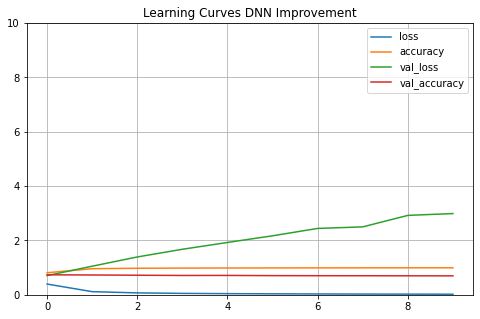

In [274]:
pd.DataFrame(model_dnn_hist_1_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves DNN Improvement")
plt.show()

This our learning curves validation loss shows more far than training loss, it may be overfit.

In [275]:
model_dnn_imp.evaluate(X_test, y_test_ohe, batch_size=64)

41/41 [==============================] - 1s 14ms/step - loss: 1.6008 - accuracy: 0.8000


[1.6007953882217407, 0.800000011920929]

In [276]:
yp_seq_dnn_imp = model_dnn_imp.predict(X_test)
yp_seq_dnn_imp[:20]

array([[6.8977896e-13, 1.0000000e+00],
       [1.5167071e-12, 1.0000000e+00],
       [1.9668387e-05, 9.9998033e-01],
       [8.7404762e-05, 9.9991262e-01],
       [4.4947952e-02, 9.5505208e-01],
       [6.2877882e-07, 9.9999940e-01],
       [9.9662614e-01, 3.3738550e-03],
       [1.9117599e-10, 1.0000000e+00],
       [1.0190229e-12, 1.0000000e+00],
       [1.3630732e-04, 9.9986362e-01],
       [1.9749416e-06, 9.9999797e-01],
       [2.2878884e-01, 7.7121115e-01],
       [5.5907679e-01, 4.4092324e-01],
       [1.1456103e-21, 1.0000000e+00],
       [1.3660838e-02, 9.8633909e-01],
       [2.7191278e-03, 9.9728084e-01],
       [3.8799375e-01, 6.1200625e-01],
       [7.0236273e-15, 1.0000000e+00],
       [8.1815541e-09, 1.0000000e+00],
       [9.9986553e-01, 1.3450246e-04]], dtype=float32)

In [277]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_dnn_imp = yp_seq_dnn_imp.argmax(axis=1)
print('Classification Report (Model Sequential Improvement DNN)')
print(classification_report(y_test, res_argmax_dnn_imp, target_names=["Not Related Disasater", "Related Disaster"]))

Classification Report (Model Sequential Improvement DNN)
                       precision    recall  f1-score   support

Not Related Disasater       0.41      0.61      0.49       410
     Related Disaster       0.92      0.83      0.88      2210

             accuracy                           0.80      2620
            macro avg       0.66      0.72      0.68      2620
         weighted avg       0.84      0.80      0.82      2620



Yess, model have good result base on classification report, after we do improvement with combination model and we did oversampling, have goodfit result, recall has increase but accuracy is not than before.

# 7 - Saving Model

Base on result we use model combination for data inference. We save model MultinomialNB and model DNN with improvements more layers and add some hidden layers, also use data has ben balanced base on classification reports it have more better than other models.

In [335]:
# freeze model
for layer in model_dnn_imp.layers:
  layer.trainable = False

In [363]:
# Model Saving MultinomialNB
with open('model_nb.pkl', 'wb') as file:
  pickle.dump(pipe_nb, file)

# prepare directory for saving model DNN
model_dnn_imp.save('model_predict_related_disaster')

# 8 - Model Inference

Based on the classification report, the model that gets the best accuracy is the Model MultinomialNB and DNN after improvements. So I will decide to use the Model MultinomialNB for data inference later so that the model can predict sentiment correctly and better, but it is not perfect.

In [403]:
# Model load MultinomialNB
with open('model_nb.pkl', 'rb') as file:
  model_nb = pickle.load(file)

In [404]:
twt = ["The biggest tsunami in asia, in Aceh on 26 May 2013"]

related = model_nb.predict_proba(twt)
if(np.argmax(related) == 0):
    print("Not Related")
elif(np.argmax(related) == 1):
    print("Related")

Related


In [405]:
related

array([[1.75695901e-04, 9.99824304e-01]])

The model has successfully predict!